In [83]:
# This is my current WIP for the project

In [88]:
# Date 10/18/24
import pandas as pd
import numpy as np
import sqlite3

# loading data from the Excel sheet
con = sqlite3.connect('salary_data_states.xlsx')

# Read the data from the table
df = pd.read_excel('salary_data_states.xlsx')

In [89]:
# Fun fact 1: Highest paid state by average
average_paid_wage_by_state = df.groupby('WORK_STATE')['PAID_WAGE_PER_YEAR'].mean()

# Find the state with the highest average paid wage
highest_avg_paid_state = average_paid_wage_by_state.idxmax()
highest_avg_paid_value = average_paid_wage_by_state.max()

# Display the result
print(f"The state with the highest average paid wage is {highest_avg_paid_state} with an average wage of ${highest_avg_paid_value}.")

The state with the highest average paid wage is West Virginia with an average wage of $109426.86892508142.


In [90]:
# Fun fact 2: Most common job title
most_common_job_title = df['JOB_TITLE'].mode()[0]
most_common_job_title_count = df['JOB_TITLE'].value_counts().max()

# Display the result
print(f"The most common job title is '{most_common_job_title}' with {most_common_job_title_count} occurrences.")

The most common job title is 'SOFTWARE ENGINEER' with 54478 occurrences.


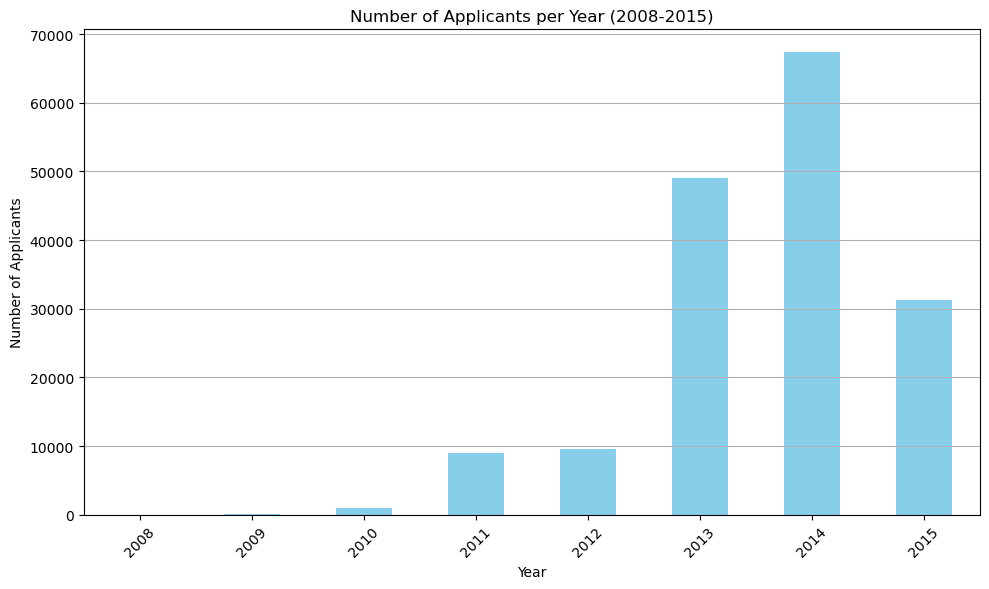

In [91]:
# Fun fact 3: Number of Applicants pr. year visually
# Convert the CASE_RECEIVED_DATE to datetime
df['CASE_RECEIVED_DATE'] = pd.to_datetime(df['CASE_RECEIVED_DATE'], errors='coerce')

# Filter the dataset for the years 2008 to 2015
df_filtered = df[(df['CASE_RECEIVED_DATE'].dt.year >= 2008) & (df['CASE_RECEIVED_DATE'].dt.year <= 2015)]

# Group by year and count the number of applicants
applicants_per_year = df_filtered['CASE_RECEIVED_DATE'].dt.year.value_counts().sort_index()

# Plotting
applicants_per_year.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Applicants per Year (2008-2015)')
plt.xlabel('Year')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()